# Pneumonia Detection

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np

#### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:\\xray\\chest_xray\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:\\xray\\chest_xray\\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Model 1 - Basic CNN Model

In [3]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
history = model.fit(training_set, epochs = 10, validation_data = test_set)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/10
163/163 [==============================] - 145s 889ms/step - loss: 0.3721 - accuracy: 0.8301 - val_loss: 0.3939 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 105s 643ms/step - loss: 0.2535 - accuracy: 0.8955 - val_loss: 0.3340 - val_accuracy: 0.8622
Epoch 3/10
163/163 [==============================] - 103s 635ms/step - loss: 0.2046 - accuracy: 0.9174 - val_loss: 0.2600 - val_accuracy: 0.8926
Epoch 4/10
163/163 [==============================] - 99s 606ms/step - loss: 0.1901 - accuracy: 0.9250 - val_loss: 0.4244 - val_accuracy: 0.8413
Epoch 5/10
163/163 [==============================] - 97s 597ms/step - loss: 0.1743 - accuracy: 0.9367 - val_loss: 0.3436 - val_accuracy: 0.8590
Epoch 6/10
163/163 [==============================] - 107s 655ms/step - loss: 0.1649 - accuracy: 0.9356 - val_loss: 0.3581 - val_accuracy: 0.8670
Epoch 7/10
163/163 [=============

#### Model 1 - Result Visualization

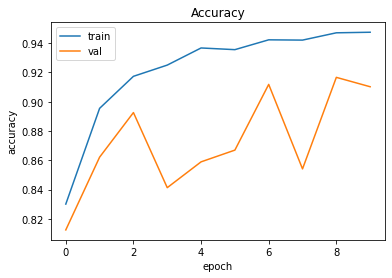

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

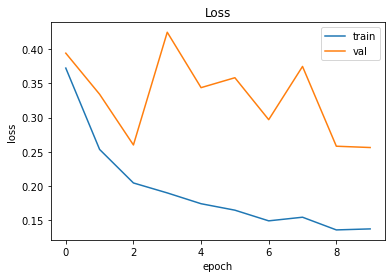

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

#### Model 1 - Model Evaluation

In [7]:
model.evaluate(training_set)

  ...
    to  
  ['...']
163/163 [==============================] - 78s 479ms/step - loss: 0.1288 - accuracy: 0.9534


[0.1287860833279834, 0.9534126]

In [8]:
score_ = model.evaluate(test_set)

  ...
    to  
  ['...']
20/20 [==============================] - 6s 309ms/step - loss: 0.2563 - accuracy: 0.9103


In [9]:
print('CNN Test loss:', score_[0])
print('CNN Test accuracy:', score_[1])

CNN Test loss: 0.25626235604286196
CNN Test accuracy: 0.9102564


### Model 2 - Transfer Learning

In [10]:
vgg_model = VGG16(input_shape=(64, 64, 3), include_top = False, weights='imagenet')
vgg_model.trainable=False

In [11]:
tmodel = Sequential()
tmodel.add(vgg_model)
tmodel.add(GlobalAveragePooling2D())
tmodel.add(Flatten())
tmodel.add(Dense(64, activation="relu"))
# tmodel.add(Dropout(0.2))
tmodel.add(Dense(128,activation='relu'))
tmodel.add(Dense(2, activation="softmax"))

In [12]:
tmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs= 10

In [13]:
thistory = tmodel.fit(
training_set,
epochs=epochs,
validation_data=test_set,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/10
163/163 [==============================] - 69s 423ms/step - loss: 0.3241 - accuracy: 0.8566 - val_loss: 0.4113 - val_accuracy: 0.8349
Epoch 2/10
163/163 [==============================] - 66s 403ms/step - loss: 0.2183 - accuracy: 0.9095 - val_loss: 0.2919 - val_accuracy: 0.8974
Epoch 3/10
163/163 [==============================] - 66s 402ms/step - loss: 0.1916 - accuracy: 0.9243 - val_loss: 0.3094 - val_accuracy: 0.8974
Epoch 4/10
163/163 [==============================] - 66s 404ms/step - loss: 0.1832 - accuracy: 0.9268 - val_loss: 0.3428 - val_accuracy: 0.8974
Epoch 5/10
163/163 [==============================] - 66s 403ms/step - loss: 0.1801 - accuracy: 0.9289 - val_loss: 0.3079 - val_accuracy: 0.8990
Epoch 6/10
163/163 [==============================] - 64s 392ms/step - loss: 0.1672 - accuracy: 0.9396 - val_loss: 0.3275 - val_accuracy: 0.8942
Epoch 7/10
163/163 [=================

#### Model 2 - Result Visualization

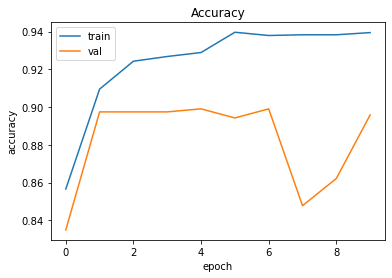

In [14]:
plt.plot(thistory.history['accuracy'])
plt.plot(thistory.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

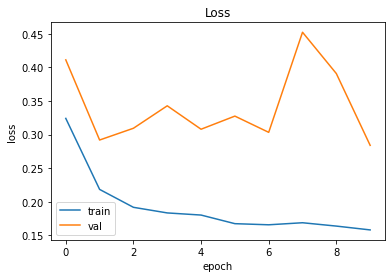

In [15]:
plt.plot(thistory.history['loss'])
plt.plot(thistory.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

#### Model 2 - Model Evaluation

In [16]:
tmodel.evaluate(training_set)

  ...
    to  
  ['...']
163/163 [==============================] - 61s 372ms/step - loss: 0.1643 - accuracy: 0.9385


[0.1642755316856083, 0.93845856]

In [17]:
score = tmodel.evaluate(test_set)

  ...
    to  
  ['...']
20/20 [==============================] - 6s 305ms/step - loss: 0.2839 - accuracy: 0.8958


In [18]:
print('VGG16 model Test loss:', score[0])
print('VGG16 model Test accuracy:', score[1])

VGG16 model Test loss: 0.28391284868121147
VGG16 model Test accuracy: 0.8958333


#### Testing

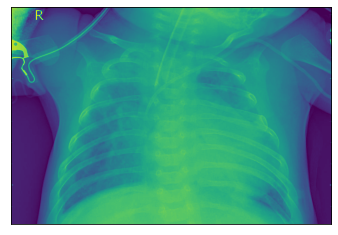

1 Pneumonia Detected


In [19]:
results={
0:'Normal Chest Xray',
1:'Pneumonia Detected'
}

im=Image.open("C:\\Users\\jeeva\\Desktop\\IMG.jpeg")
imgplot = plt.imshow(im)
plt.xticks([]), plt.yticks([])
plt.show()

img = image.load_img('C:\\Users\\jeeva\\Desktop\\IMG.jpeg',target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

pred = tmodel.predict_classes([img_data])[0]

print(pred,results[pred])

In [20]:
model.save('Pneumonia_CNN.h5')
tmodel.save('Pneumonia_TL.h5')